# INFO 3401 – Class 25: Choropleths and basemaps

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT).

## Learning Objectives
This lecture will reinforce our previous example of joining a pandas DataFrame with a GeoPandas GeoDataFrame and visualizing the result and making choropleth visualizations of spatial data.

* Making choropleths using international and local spatial data
* Working with geoplot

## Background

This module will explore how to acquire, analyze, and visualize spatial data. I have adapted this content from the excellent course [Auotmating GIS processes](https://automating-gis-processes.github.io/site/index.html) course by [Vuokko Heikinheimo](https://researchportal.helsinki.fi/en/persons/vuokko-vilhelmiina-heikinheimo) and [Henrikki Tenkanen](https://www.ucl.ac.uk/geospatial-analytics/people/henrikki-tenkanen).

## Load libraries

Load our usual libraries.

In [1]:
# Data processing libraries
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

# Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

# Geospatial libraries
import geopandas as gpd
from pyproj import CRS

## Load data

Load the countries spatial data we used in Class 23.

In [2]:
countries_geojson_gdf = gpd.read_file('https://github.com/datasets/geo-countries/raw/master/data/countries.geojson',driver='GeoJSON')

countries_geojson_gdf.head()

,ADMIN,ISO_A3,ISO_A2,geometry
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ..."
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38..."
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42..."


In [3]:
type(countries_geojson_gdf)

geopandas.geodataframe.GeoDataFrame

Check our DataFrame shape.

In [4]:
countries_geojson_gdf.shape

(255, 4)

Check our CRS.

In [5]:
countries_geojson_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Load [UN data](https://data.un.org/) about Internet usage.

In [6]:
internet_df = pd.read_csv('https://data.un.org/_Docs/SYB/CSV/SYB62_314_201904_Internet%20Usage.csv',
                          encoding='latin1',
                          header=[1])

internet_pivot_df = pd.pivot_table(internet_df,
                                   index='Unnamed: 1',
                                   columns='Year',
                                   values='Value')

internet_pivot_df.index.name = 'Country'

internet_pivot_df.head()


Year,2000,2005,2010,2014,2015,2016,2017
Country,,,,,,,
Afghanistan,NaN,1.2,4.0,7.0,8.3,10.6,11.4
Albania,0.1,6.0,45.0,60.1,63.3,66.4,71.8
Algeria,0.5,5.8,12.5,29.5,38.2,42.9,47.7
Andorra,10.5,37.6,81.0,95.9,96.9,97.9,98.9
Angola,0.1,1.1,2.8,10.2,12.4,13.0,14.3


Are the country names the same in both DataFrames?

In [7]:
set(countries_geojson_gdf['ADMIN'].unique()) - set(internet_pivot_df.index)

{'Akrotiri Sovereign Base Area',
 'Aland',
 'American Samoa',
 'Antarctica',
 'Ashmore and Cartier Islands',
 'Bajo Nuevo Bank (Petrel Is.)',
 'Baykonur Cosmodrome',
 'Bolivia',
 'British Indian Ocean Territory',
 'Brunei',
 'Cape Verde',
 'Clipperton Island',
 'Coral Sea Islands',
 'Cyprus No Mans Area',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Dhekelia Sovereign Base Area',
 'East Timor',
 'Falkland Islands',
 'Federated States of Micronesia',
 'French Southern and Antarctic Lands',
 'Guinea Bissau',
 'Heard Island and McDonald Islands',
 'Hong Kong S.A.R.',
 'Indian Ocean Territories',
 'Iran',
 'Isle of Man',
 'Ivory Coast',
 'Kosovo',
 'Laos',
 'Macao S.A.R',
 'Macedonia',
 'Moldova',
 'Norfolk Island',
 'North Korea',
 'Northern Cyprus',
 'Northern Mariana Islands',
 'Palestine',
 'Pitcairn Islands',
 'Republic of Congo',
 'Republic of Serbia',
 'Russia',
 'Saint Barthelemy',
 'Saint Martin',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Sc

In [8]:
set(internet_pivot_df.index) - set(countries_geojson_gdf['ADMIN'].unique())

{'Ascension',
 'Asia',
 'Australia and New Zealand',
 'Bahamas',
 'Bolivia (Plurin. State of)',
 'Brunei Darussalam',
 'Cabo Verde',
 'Caribbean',
 'Central Asia',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Congo',
 'Czechia',
 'Côte d\x92Ivoire',
 "Dem. People's Rep. Korea",
 'Dem. Rep. of the Congo',
 'Eastern Africa',
 'Eastern Asia',
 'Eswatini',
 'Europe',
 'Falkland Islands (Malvinas)',
 'Guinea-Bissau',
 'Iran (Islamic Republic of)',
 "Lao People's Dem. Rep.",
 'Latin America',
 'Latin America & the Caribbean',
 'Mayotte',
 'Micronesia (Fed. States of)',
 'Middle Africa',
 'Netherlands Antilles [former]',
 'North Macedonia',
 'Northern Africa',
 'Northern America',
 'Oceania',
 'Other non-specified areas',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Réunion',
 'Saint Vincent & Grenadines',
 'Serbia',
 'South-central Asia',
 'South-eastern Asia',
 'Southern Africa',
 'Southern Asia',
 'State of Palestine',
 'Sub-Saharan Africa',
 'Syrian Arab Repub

Try to fix some of the names in `internet_pivot_df`.

In [9]:
country_rename_d = {'Bolivia (Plurin. State of)':'Bolivia',
                    'Brunei Darussalam':'Brunei',
                    'Cabo Verde':'Cape Verde',
                    'China, Hong Kong SAR':'Hong Kong S.A.R.',
                    'China, Macao SAR':'Macao S.A.R.',
                    'Congo':'Republic of Congo',
                    'Czechia':'Czech Republic',
                    'Dem. Rep. of the Congo':'Democratic Republic of the Congo',
                    'Côte d\x92Ivoire':'Ivory Coast',
                    "Dem. People's Rep. Korea":'North Korea',
                    'Guinea-Bissau':'Guinea Bissau',
                    'Iran (Islamic Republic of)':'Iran',
                    "Lao People's Dem. Rep.":'Laos',
                    'Republic of Korea':'South Korea',
                    'Republic of Moldova':'Moldova',
                    'Russian Federation':'Russia',
                    'State of Palestine':'Palestine',
                    'Serbia':'Republic of Serbia',
                    'Syrian Arab Republic':'Syria',
                    'Venezuela (Boliv. Rep. of)':'Venezuela',
                    'United Rep. of Tanzania':'United Republic of Tanzania',
                    'Viet Nam':'Vietnam'
                   }

In [10]:
internet_pivot_df.rename(index=country_rename_d,inplace=True)

Join the "ADMIN" column from `countries_geojson_gpd` with the index from `internet_pivot_df`.

In [11]:
internet_country_df = pd.merge(left = countries_geojson_gdf,
                               right = internet_pivot_df,
                               how = 'left',
                               left_on = 'ADMIN',
                               right_index = True
                              )

internet_country_df.head()

,ADMIN,ISO_A3,ISO_A2,geometry,2000,2005,2010,2014,2015,2016,2017
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ...",15.4,25.4,62.0,83.8,88.7,93.5,97.2
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38...",NaN,1.2,4.0,7.0,8.3,10.6,11.4
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",0.1,1.1,2.8,10.2,12.4,13.0,14.3
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...",22.4,29.0,49.6,70.4,76.0,81.6,81.6
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42...",0.1,6.0,45.0,60.1,63.3,66.4,71.8


Check the type after merging. Is this a pandas DataFrame or a GeoPandas GeoDataFrame?

In [12]:
type(countries_geojson_gdf), type(internet_pivot_df), type(internet_country_df)

(geopandas.geodataframe.GeoDataFrame,
 pandas.core.frame.DataFrame,
 geopandas.geodataframe.GeoDataFrame)

Check the shapes of the merged GeoDataFrame compared to the shapes before.

In [13]:
countries_geojson_gdf.shape, internet_pivot_df.shape, internet_country_df.shape

((255, 4), (245, 7), (255, 11))

## Experiment with visualizations
Use the `.plot` method on the `internet_country_df` GeoDataFrame.

In [14]:
internet_country_df.head(2)

,ADMIN,ISO_A3,ISO_A2,geometry,2000,2005,2010,2014,2015,2016,2017
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ...",15.4,25.4,62.0,83.8,88.7,93.5,97.2
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38...",NaN,1.2,4.0,7.0,8.3,10.6,11.4


<AxesSubplot:>

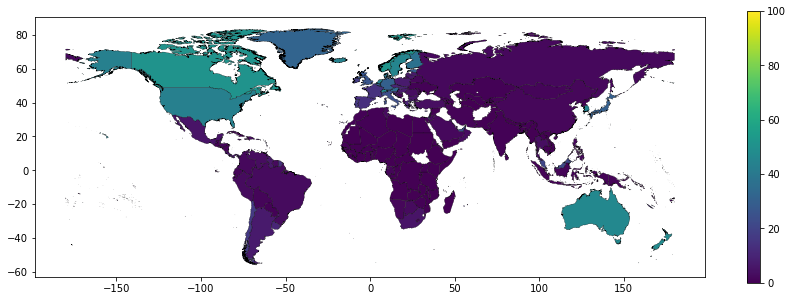

In [15]:
f,ax = plt.subplots(figsize=(15,10))

internet_country_df.plot(column=2000,
                         vmin=0,
                         vmax=100,
                         edgecolor='k',
                         lw=.25,
                         legend=True,
                         legend_kwds={'shrink':.5}, # https://stackoverflow.com/a/62228642/1574687
                         ax=ax)

Change to a different year.

<AxesSubplot:>

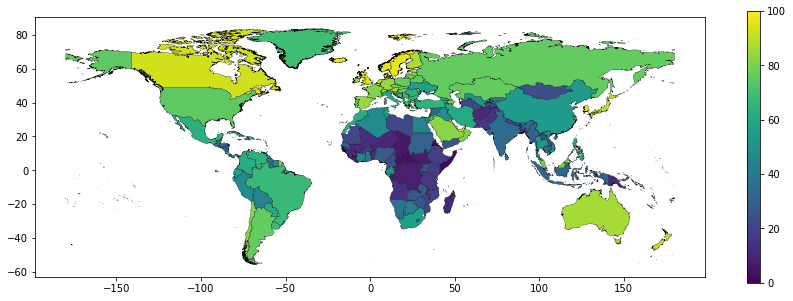

In [16]:
f,ax = plt.subplots(figsize=(15,10))

internet_country_df.plot(column=2017,
                         vmin=0,
                         vmax=100,
                         edgecolor='k',
                         lw=.25,
                         legend=True,
                         legend_kwds={'shrink':.5}, # https://stackoverflow.com/a/62228642/1574687
                         ax=ax)

Change to a different projection.

<AxesSubplot:>

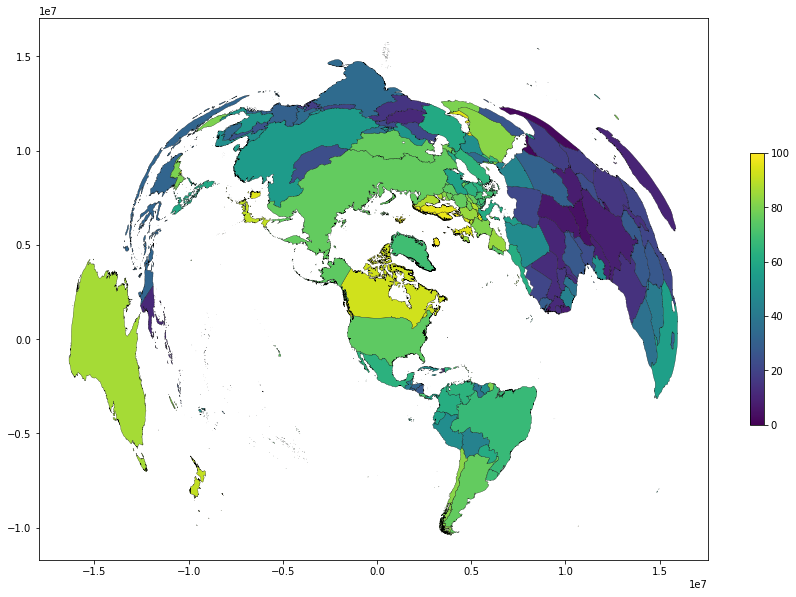

In [17]:
aeqd = CRS(proj='aeqd',ellps='WGS84',datum='WGS84',lat_0=38.99853,lon_0=-105.54782).srs

f,ax = plt.subplots(figsize=(15,10))
internet_country_df.to_crs(crs=aeqd).plot(column=2017,
                         vmin=0,
                         vmax=100,
                         edgecolor='k',
                         lw=.25,
                         legend=True,
                         legend_kwds={'shrink':.5}, # https://stackoverflow.com/a/62228642/1574687
                         ax=ax)

Download another dataset from the UN, clean up the country names, and visualize.

,OBJECTID,DISTRICT,PRECINCT,ABBREVIATI,EDIT_STAT,NOTES,SHAPEarea,SHAPElen,geometry
0,1,2181107506,2181107506,506,None,None,2.126887e+07,20223.228724,"POLYGON ((-105.15055 40.08733, -105.15056 40.0..."
1,2,2181107702,2181107702,702,None,None,1.186144e+08,61359.675227,"POLYGON ((-105.14988 40.13407, -105.14963 40.1..."
2,3,2181107505,2181107505,505,None,None,2.398745e+07,22560.123010,"POLYGON ((-105.16275 40.10161, -105.16275 40.1..."
3,4,2181107701,2181107701,701,None,None,1.728000e+08,73356.477307,"POLYGON ((-105.18323 40.12389, -105.18323 40.1..."
4,5,2181107705,2181107705,705,None,None,4.708790e+08,132293.031420,"POLYGON ((-105.15906 40.26122, -105.15905 40.2..."


## Boulder County precincts

Download the Boulder County precinct shapefile: https://opendata-bouldercounty.hub.arcgis.com/datasets/precincts

Download the 2016 "General Election precinct-level results in Excel" from the CO Secretary of State: https://www.sos.state.co.us/pubs/elections/Results/archive2000.html

Load the precincts (note I have change the directory to "boco_precincts").

In [2]:
boco_precinct_gdf = gpd.read_file('boco_precincts/Precincts.shp',dtype={'PRECINCT':str})
boco_precinct_gdf.head()

,OBJECTID,DISTRICT,PRECINCT,ABBREVIATI,EDIT_STAT,NOTES,SHAPEarea,SHAPElen,geometry
0,1,2181107506,2181107506,506,None,None,2.126887e+07,20223.228724,"POLYGON ((-105.15055 40.08733, -105.15056 40.0..."
1,2,2181107702,2181107702,702,None,None,1.186144e+08,61359.675227,"POLYGON ((-105.14988 40.13407, -105.14963 40.1..."
2,3,2181107505,2181107505,505,None,None,2.398745e+07,22560.123010,"POLYGON ((-105.16275 40.10161, -105.16275 40.1..."
3,4,2181107701,2181107701,701,None,None,1.728000e+08,73356.477307,"POLYGON ((-105.18323 40.12389, -105.18323 40.1..."
4,5,2181107705,2181107705,705,None,None,4.708790e+08,132293.031420,"POLYGON ((-105.15906 40.26122, -105.15905 40.2..."


Check the CRS.

In [3]:
boco_precinct_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Load the CO 2016 precinct-level results.

In [4]:
co2016_results_df = pd.read_excel('2016GeneralResultsPrecinctLevel.xlsx',
                                  dtype={'Precinct':str})
co2016_results_df.head()

,State,Year,Election Type,County,Precinct,Office/Issue/Judgeship,Candidate,Party,Candidate Votes,Yes Votes,No Votes
0,Colorado,2016,G,Adams,4253001245,President/Vice President,Hillary Clinton / Tim Kaine,Democratic Party,63,0.0,0.0
1,Colorado,2016,G,Adams,4253001245,President/Vice President,Donald J. Trump / Michael R. Pence,Republican Party,259,0.0,0.0
2,Colorado,2016,G,Adams,4253001245,President/Vice President,Darrell L. Castle / Scott N. Bradley,American Constitution Party,0,0.0,0.0
3,Colorado,2016,G,Adams,4253001245,President/Vice President,Gary Johnson / Bill Weld,Libertarian Party,12,0.0,0.0
4,Colorado,2016,G,Adams,4253001245,President/Vice President,Jill Stein / Ajamu Baraka,Green Party,0,0.0,0.0


Check to make sure there's some overlap.

In [21]:
len(set(boco_precinct_gdf['PRECINCT']) & set(co2016_results_df['Precinct']))

233

Filter `co2016_results_df` to just "President/Vice President" for the Democratic and Republican parties in Boulder County.

In [5]:
_c0 = co2016_results_df['Office/Issue/Judgeship'] == 'President/Vice President'
_c1 = co2016_results_df['Candidate'].isin(['Hillary Clinton / Tim Kaine','Donald J. Trump / Michael R. Pence'])

filtered_co2016_results_df = co2016_results_df[_c0 & _c1]

print(filtered_co2016_results_df.shape)
filtered_co2016_results_df.head()

(6022, 11)


,State,Year,Election Type,County,Precinct,Office/Issue/Judgeship,Candidate,Party,Candidate Votes,Yes Votes,No Votes
0,Colorado,2016,G,Adams,4253001245,President/Vice President,Hillary Clinton / Tim Kaine,Democratic Party,63,0.0,0.0
1,Colorado,2016,G,Adams,4253001245,President/Vice President,Donald J. Trump / Michael R. Pence,Republican Party,259,0.0,0.0
78,Colorado,2016,G,Adams,4255601241,President/Vice President,Hillary Clinton / Tim Kaine,Democratic Party,1,0.0,0.0
79,Colorado,2016,G,Adams,4255601241,President/Vice President,Donald J. Trump / Michael R. Pence,Republican Party,29,0.0,0.0
157,Colorado,2016,G,Adams,4255601246,President/Vice President,Hillary Clinton / Tim Kaine,Democratic Party,187,0.0,0.0


Reshape and feature engineer.

In [6]:
precinct_2016_results_df = pd.pivot_table(data = filtered_co2016_results_df,
              index = 'Precinct',
              columns = 'Candidate',
              values = 'Candidate Votes')

precinct_2016_results_df['Total'] = precinct_2016_results_df.sum(1)
precinct_2016_results_df.columns = ['GOP','Dem','Total']

precinct_2016_results_df['gop_voteshare'] = precinct_2016_results_df['GOP'] / precinct_2016_results_df['Total']

precinct_2016_results_df.head()

,GOP,Dem,Total,gop_voteshare
Precinct,,,,
1160116112,323,491,814,0.396806
1160116113,280,510,790,0.354430
1160116114,320,577,897,0.356745
1160116120,388,634,1022,0.379648
1160116122,380,583,963,0.394600


Merge both.

In [24]:
boco_precinct_gdf.head(1)

,OBJECTID,DISTRICT,PRECINCT,ABBREVIATI,EDIT_STAT,NOTES,SHAPEarea,SHAPElen,geometry
0,1,2181107506,2181107506,506,None,None,2.126887e+07,20223.228724,"POLYGON ((-105.15055 40.08733, -105.15056 40.0..."


In [25]:
boco_precinct_results = pd.merge(left = boco_precinct_gdf,
                                right = precinct_2016_results_df,
                                 how = 'left',
                                 left_on = 'PRECINCT',
                                 right_index = True
                                )

boco_precinct_results.head()

,OBJECTID,DISTRICT,PRECINCT,ABBREVIATI,EDIT_STAT,NOTES,SHAPEarea,SHAPElen,geometry,GOP,Dem,Total,gop_voteshare
0,1,2181107506,2181107506,506,None,None,2.126887e+07,20223.228724,"POLYGON ((-105.15055 40.08733, -105.15056 40.0...",179.0,322.0,501.0,0.357285
1,2,2181107702,2181107702,702,None,None,1.186144e+08,61359.675227,"POLYGON ((-105.14988 40.13407, -105.14963 40.1...",119.0,153.0,272.0,0.437500
2,3,2181107505,2181107505,505,None,None,2.398745e+07,22560.123010,"POLYGON ((-105.16275 40.10161, -105.16275 40.1...",161.0,548.0,709.0,0.227080
3,4,2181107701,2181107701,701,None,None,1.728000e+08,73356.477307,"POLYGON ((-105.18323 40.12389, -105.18323 40.1...",170.0,298.0,468.0,0.363248
4,5,2181107705,2181107705,705,None,None,4.708790e+08,132293.031420,"POLYGON ((-105.15906 40.26122, -105.15905 40.2...",253.0,292.0,545.0,0.464220


Plot the results.

<AxesSubplot:>

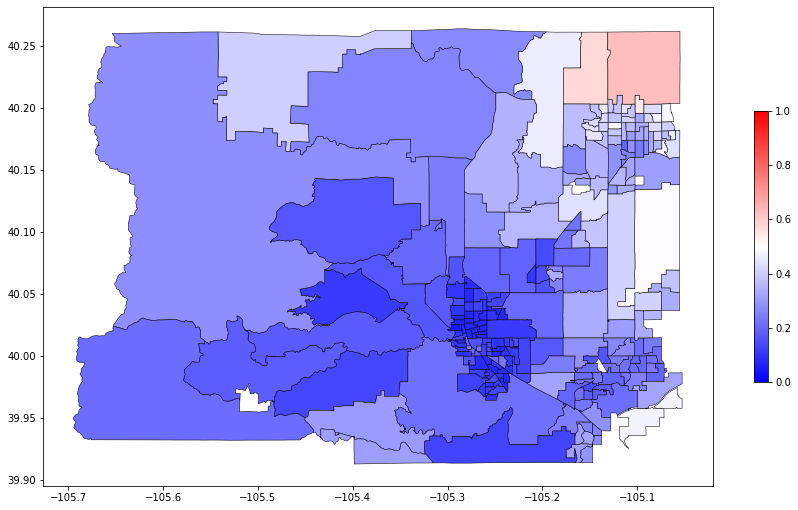

In [26]:
f,ax = plt.subplots(figsize=(15,10))

boco_precinct_results.plot(column = 'gop_voteshare',
                           legend = True,
                           vmin = 0,
                           vmax = 1,
                           cmap = 'bwr',
                           edgecolor='k',
                           lw=.5,
                           legend_kwds={'shrink':.5}, # https://stackoverflow.com/a/62228642/1574687
                           ax=ax)

## Denver County precinct
Download, unzip, and load the [Denver County election precinct shapefile](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-election-precincts). Note the folder name of where the Denver data lives.

In [11]:
denco_precinct_gdf = gpd.read_file('denco_precincts/election_precincts.shp',
                                   dtype={'PRECINCT_N':str}
                                  )
denco_precinct_gdf.head()

,PRECINCT,PRECINCT_N,PRECINCT_C,SENATE_DIS,HOUSE_DIST,COUNCIL_DI,RTD_DIST,DPS_DIST,geometry
0,839.0,1330816839,839,33,8,8,B,4,"POLYGON ((-104.88077 39.75611, -104.88079 39.7..."
1,840.0,1330816840,840,33,8,8,B,4,"POLYGON ((-104.87994 39.75466, -104.87994 39.7..."
2,841.0,1310816841,841,31,8,10,A,3,"POLYGON ((-104.96871 39.74001, -104.96846 39.7..."
3,842.0,1310816842,842,31,8,10,A,3,"POLYGON ((-104.96538 39.74000, -104.96501 39.7..."
4,843.0,1310816843,843,31,8,10,A,3,"POLYGON ((-104.95978 39.73999, -104.95978 39.7..."


In [20]:
denco_precinct_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
precinct_2016_results_df.head()

,GOP,Dem,Total,gop_voteshare
Precinct,,,,
1160116112,323,491,814,0.396806
1160116113,280,510,790,0.354430
1160116114,320,577,897,0.356745
1160116120,388,634,1022,0.379648
1160116122,380,583,963,0.394600


Make sure there's stuff in the overlap.

In [19]:
len(set(denco_precinct_gdf['PRECINCT_N'].values) & set(precinct_2016_results_df.index))

346

Merge both.

In [26]:
denco_precinct_results = pd.merge(left = denco_precinct_gdf,
                                  right = precinct_2016_results_df,
                                  how = 'left',
                                  left_on = 'PRECINCT_N',
                                  right_index = True
                                 )

denco_precinct_results.head()

,PRECINCT,PRECINCT_N,PRECINCT_C,SENATE_DIS,HOUSE_DIST,COUNCIL_DI,RTD_DIST,DPS_DIST,geometry,GOP,Dem,Total,gop_voteshare
0,839.0,1330816839,839,33,8,8,B,4,"POLYGON ((-104.88077 39.75611, -104.88079 39.7...",64.0,404.0,468.0,0.136752
1,840.0,1330816840,840,33,8,8,B,4,"POLYGON ((-104.87994 39.75466, -104.87994 39.7...",80.0,391.0,471.0,0.169851
2,841.0,1310816841,841,31,8,10,A,3,"POLYGON ((-104.96871 39.74001, -104.96846 39.7...",87.0,891.0,978.0,0.088957
3,842.0,1310816842,842,31,8,10,A,3,"POLYGON ((-104.96538 39.74000, -104.96501 39.7...",110.0,677.0,787.0,0.139771
4,843.0,1310816843,843,31,8,10,A,3,"POLYGON ((-104.95978 39.73999, -104.95978 39.7...",65.0,787.0,852.0,0.076291


In [22]:
type(denco_precinct_results)

geopandas.geodataframe.GeoDataFrame

Plot the results.

In [31]:
import contextily

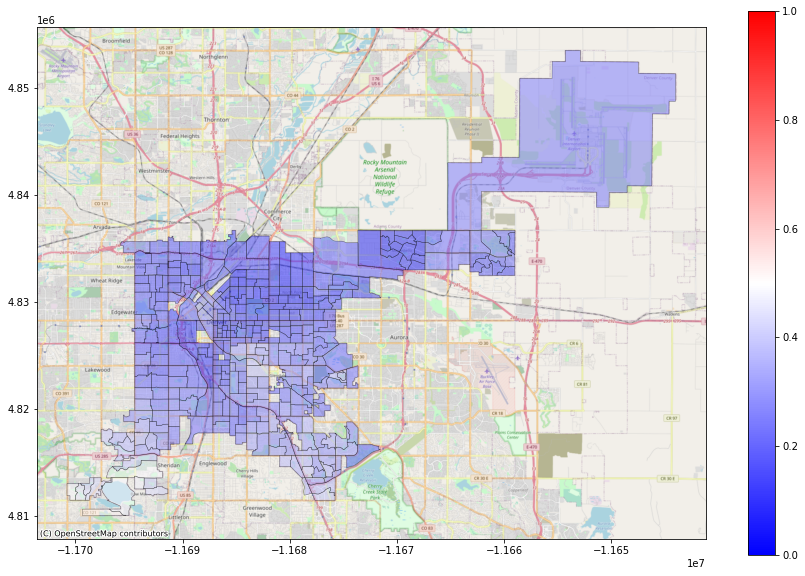

In [34]:
f,ax = plt.subplots(figsize=(15,10))

webmercator_crs_denco = denco_precinct_results.to_crs(epsg='3857')

webmercator_crs_denco.plot(column = 'gop_voteshare',
                            legend = True,
                            cmap = 'bwr',
                            vmin = 0,
                            vmax = 1,
                            edgecolor = 'k',
                            lw = .5,
                           alpha = .5,
                            ax=ax)

contextily.add_basemap(ax=ax,
                       source=contextily.providers.OpenStreetMap.Mapnik)

## County-level results
Do it by county.

In [48]:
county_2016_results_df = pd.pivot_table(data=filtered_co2016_results_df,
               index = 'County',
               columns = 'Candidate',
               values = 'Candidate Votes',
               aggfunc = 'sum'
              )

county_2016_results_df['Total'] = county_2016_results_df.sum(1)
county_2016_results_df.columns = ['GOP','Dem','Total']
county_2016_results_df['gop_voteshare'] = county_2016_results_df['GOP']/county_2016_results_df['Total']

county_2016_results_df.head()


,GOP,Dem,Total,gop_voteshare
County,,,,
Adams,80082,96558,176640,0.453363
Alamosa,3046,3189,6235,0.488532
Arapahoe,117053,159885,276938,0.422669
Archuleta,4264,2500,6764,0.630396
Baca,1753,283,2036,0.861002


Read in the [county shapefile](https://data.colorado.gov/Transportation/Counties-in-Colorado/67vn-ijga) from data.colorado.gov and merge both. Note: this directory and filename are likely different from what you downloaded. Rename in your file explorer.

In [37]:
co_county_gdf = gpd.read_file('co_counties/co_counties.shp')

co_county_gdf['county'] = co_county_gdf['county'].str.title()

co_county_gdf.head()

,co_fips,county,househo_20,pop_2010,shape_st_1,shape_st_2,shape_star,shape_stle,geometry
0,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9..."
1,3.0,Alamosa,6008.0,15445.0,1.872295e+09,177555.351470,0.0,0.0,"POLYGON ((-105.59917 37.75216, -105.51619 37.7..."
2,5.0,Arapahoe,225124.0,572003.0,2.084863e+09,335003.471310,0.0,0.0,"MULTIPOLYGON (((-103.70653 39.73986, -103.7066..."
3,7.0,Archuleta,5257.0,12084.0,3.504795e+09,263558.683443,0.0,0.0,"POLYGON ((-107.12854 37.42287, -107.12881 37.3..."
4,11.0,Bent,1835.0,6499.0,3.990976e+09,254662.200852,0.0,0.0,"POLYGON ((-102.74208 38.26675, -102.74211 38.2..."


Merge both.

In [54]:
county_2016_results_gdf = pd.merge(left = co_county_gdf,
                                   right = county_2016_results_df,
                                   how = 'left',
                                   left_on = 'county',
                                   right_index = True
                                  )

county_2016_results_gdf.head()

,co_fips,county,househo_20,pop_2010,shape_st_1,shape_st_2,shape_star,shape_stle,geometry,GOP,Dem,Total,gop_voteshare
0,1.0,Adams,154502.0,441603.0,3.064413e+09,392729.110497,0.0,0.0,"POLYGON ((-103.70574 39.99991, -103.70569 39.9...",80082,96558,176640,0.453363
1,3.0,Alamosa,6008.0,15445.0,1.872295e+09,177555.351470,0.0,0.0,"POLYGON ((-105.59917 37.75216, -105.51619 37.7...",3046,3189,6235,0.488532
2,5.0,Arapahoe,225124.0,572003.0,2.084863e+09,335003.471310,0.0,0.0,"MULTIPOLYGON (((-103.70653 39.73986, -103.7066...",117053,159885,276938,0.422669
3,7.0,Archuleta,5257.0,12084.0,3.504795e+09,263558.683443,0.0,0.0,"POLYGON ((-107.12854 37.42287, -107.12881 37.3...",4264,2500,6764,0.630396
4,11.0,Bent,1835.0,6499.0,3.990976e+09,254662.200852,0.0,0.0,"POLYGON ((-102.74208 38.26675, -102.74211 38.2...",1188,590,1778,0.668166


In [52]:
county_2016_results_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Plot the results.

In [65]:
county_2016_results_gdf[county_2016_results_gdf['county'] == 'Yuma']

,co_fips,county,househo_20,pop_2010,shape_st_1,shape_st_2,shape_star,shape_stle,geometry,GOP,Dem,Total,gop_voteshare
63,125.0,Yuma,3947.0,10043.0,6.137023e+09,321423.270613,0.0,0.0,"POLYGON ((-102.05155 40.43985, -102.05136 40.4...",3850,726,4576,0.841346


<AxesSubplot:>

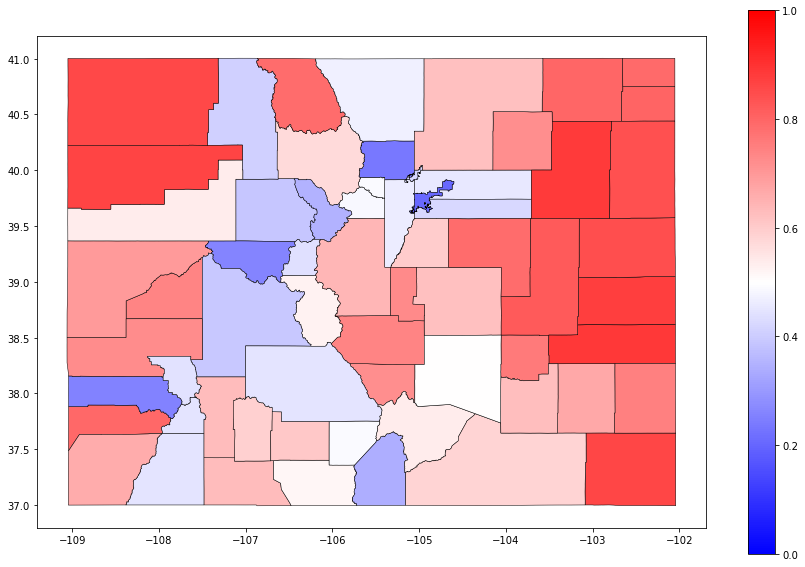

In [61]:
f,ax = plt.subplots(figsize=(15,10))

county_2016_results_gdf.plot(column = 'gop_voteshare',
                             ax = ax,
                             legend = True,
                             cmap = 'bwr',
                             vmin = 0,
                             vmax = 1,
                             edgecolor = 'k',
                             lw = .5
                            )

## Using geoplot

These maps are missing a lot of important context. [Geoplot](https://residentmario.github.io/geoplot/index.html) is a visualization libary that can ingest GeoDataFrames but also include map tiles from OpenStreetMap and other open geo data sources. Basically, we can overlay the precinct data with the map of the region.

In [27]:
import geoplot
import geoplot.crs as gcrs

# https://github.com/darribas/contextily
import contextily

# For help with the legend
import matplotlib.colors as colors

Use the `webmap` method with:

* the GeoDataFrame (to get the map extents)
* a provider (alternatives available from [`contextily`](https://github.com/darribas/contextily))
* and the WebMercator() projection

On this last point, you may need to cast your orignal data in another CRS to EPSG 3785/3857/4326.

Plot the `boco_precinct_results` with a well-normalized legend.

<GeoAxesSubplot:>

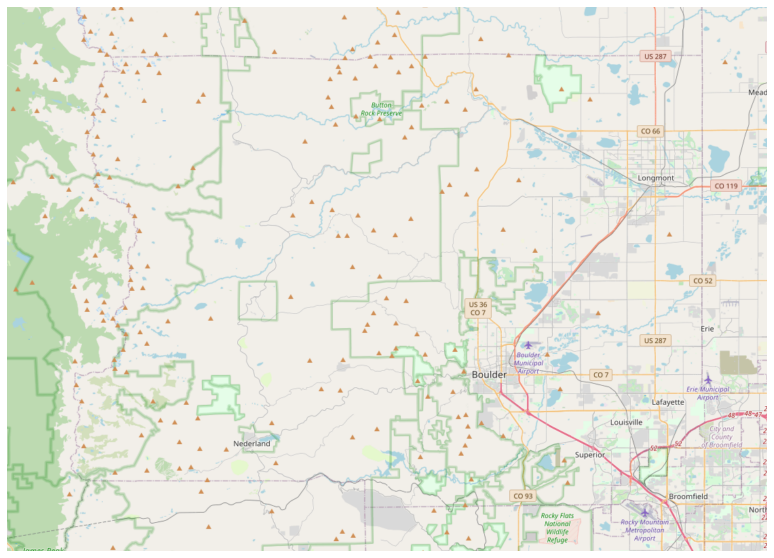

<GeoAxesSubplot:>

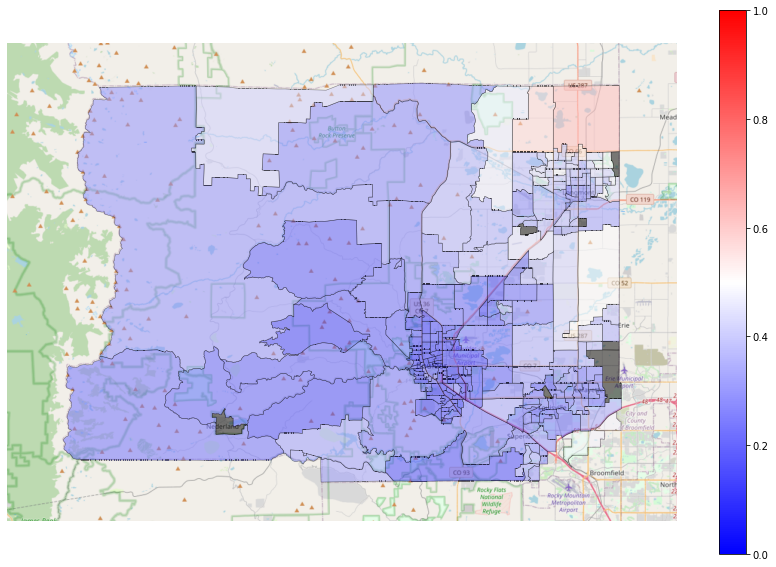

In [46]:
# Make the background map
# https://github.com/geopandas/contextily/blob/master/tiles.png
ax = geoplot.webmap(boco_precinct_results,
                    providers = contextily.providers.Stamen.Watercolor,
                    projection = gcrs.WebMercator(),
                    figsize = (15,10)
                   )

# https://github.com/ResidentMario/geoplot/issues/163#issuecomment-522285331
norm = colors.Normalize(vmin=0, vmax=1)

geoplot.choropleth(df = boco_precinct_results,
                   hue = 'gop_voteshare',
                   cmap = 'bwr',
                   norm = norm,
                   edgecolor = 'k',
                   linewidth = .5,
                   legend = True,
                   ax = ax,
                   alpha = .5,
                  )

Plot the `denco_precinct_results` with a well-normalized legend.

Plot the `county_2016_results_gdf` with a well-normalized legend.